<a href="https://colab.research.google.com/github/paascorb/AgendaAndroidStudio/blob/master/Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualización de los datos

En este notebook vamos a visualizar los datos del dataset de entrenamiento del 1er entregable.

Cargamos e instalamos las librerias necesarias.

In [1]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 5.7MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Y cargamos el dataset de entrenamiento en df.

In [4]:
df = pd.read_csv('train.csv')

##Visualización univariante

Primero vamos a visualizar con un histograma la distribución de la presión sanguinea y las pulsaciones por minuto.

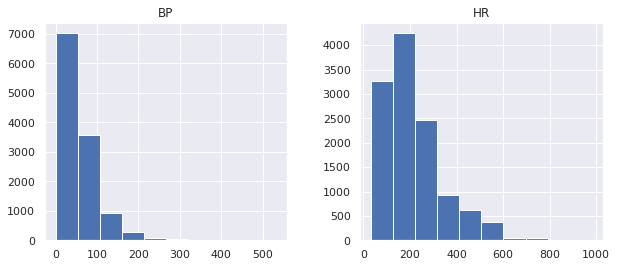

In [6]:
features = ['BP', 'HR']
df[features].hist(figsize=(10, 4));

Ahora veremos un grafico de cajas y otro de violines del electroencefalograma.

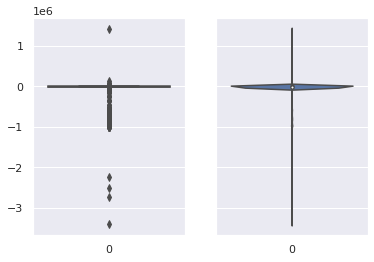

In [8]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['EEG'], ax=axes[0]);
sns.violinplot(data=df['EEG'], ax=axes[1]);

Vemos que este descriptor tiene valores atípicos muy alejados de la media.

Por eso voy a mostrar la desviación típica para ver como de grande es.

In [9]:
print(df['EEG'].std())

128476.5397391195


Podemos comprobar que 128.476 es un valor muy elevado.

Ahora vamos a visualizar las distintas actividades representadas en un gráfico de barras.

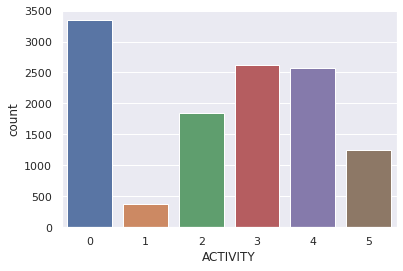

In [10]:
sns.countplot(x='ACTIVITY', data=df)

##Visualización multivariante

Ahora vamos a realizar una visualización multivariantes de todos los descriptores, comenzando con una matriz de correlación.

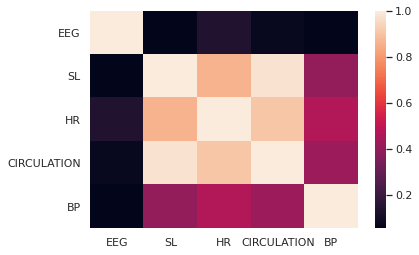

In [16]:
numerical = list(set(df.columns) - 
                 set(['ACTIVITY']))

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

Vemos que en general todas las variables están algo relacionadas, excepto EEG que dista mucho del resto de descriptores, BP también dista algo del resto.

Y sobre todo SL esta muy relacionado con CIRCULATION, así que estás dos variables juntas no aportan información adicional.

Hay también bastante relación entre CIRCULATION y HR.

Ahora en un Diagrama de dispersión vamos a ver la correlacion entre SL y HR.

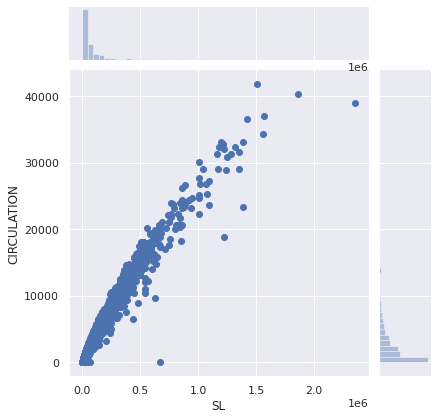

In [27]:
sns.jointplot(x='SL', y='HR', 
              data=df, kind='scatter');

Vemos que algo de correlación hay.

A continucación mostramos un gráfico con las dos variables más correladas.

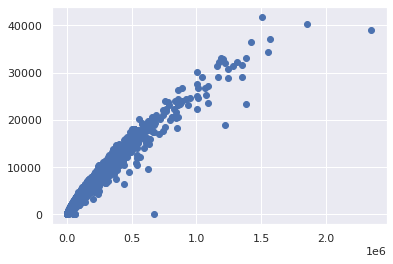

In [28]:
plt.scatter(df['SL'], df['CIRCULATION']);

Podemos comprobar que prácticamente es una diagonal. Por lo tanto están altamente correlados.

Lo próximo que haremos será mostrar la matriz de diagramas de dispersión

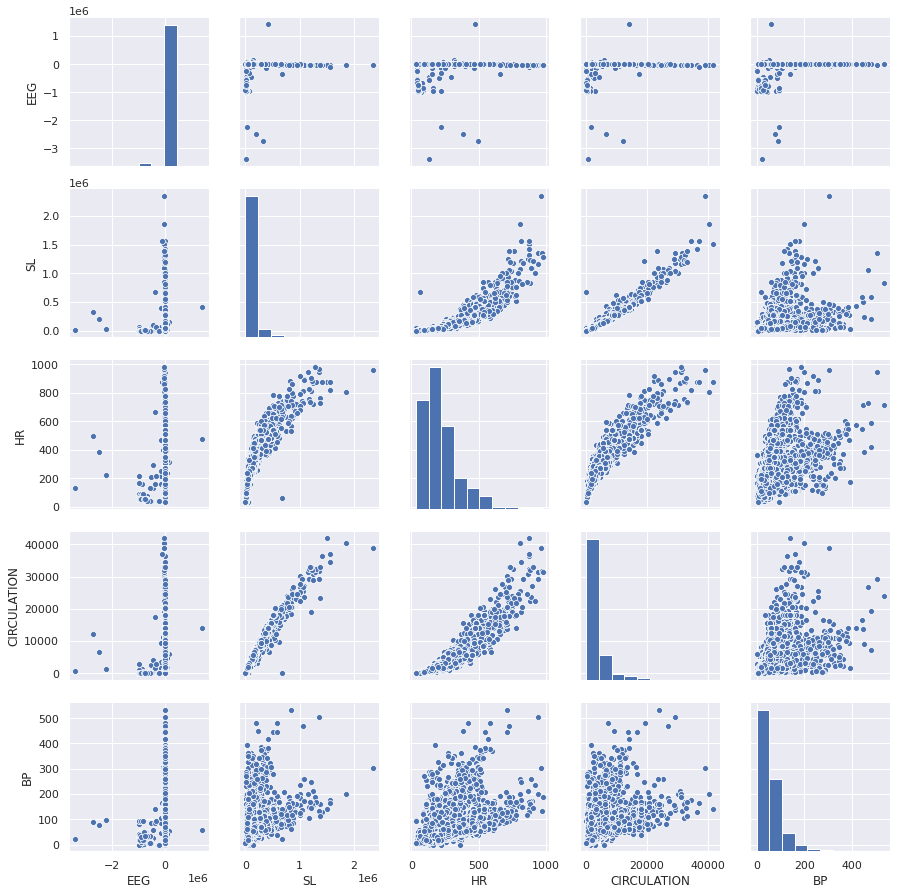

In [29]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [30]:
# Volvemos a cambiar la configuración
%config InlineBackend.figure_format = 'svg'

Para finalizar mostraremos un gráfico de dispersión pero con 3 descriptores.

Serán los niveles de azucar y los pulsos cardíacos, vistos con el tercer descriptor de las distintas actividades.

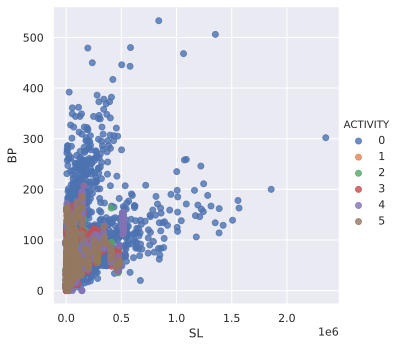

In [31]:
sns.lmplot('SL', 'BP', data=df, hue='ACTIVITY', fit_reg=False);

Casi todas las actividades estan focalizadas en el mismo sitio, excepto las personas de pie que se alejan y toman valores más atípicos.

Para finalizar veremos los gráficos de violines para cada actividad de los latidos por minuto.

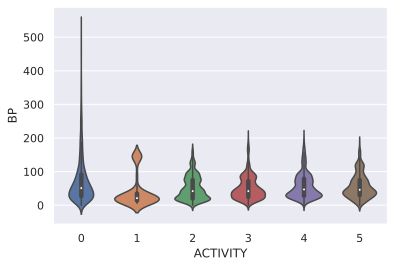

In [33]:
sns.violinplot(x='ACTIVITY', y='BP', data=df);